# Munich Rankings

In [24]:
import json
import geopandas as gpd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [80]:
def load_geojson(path):
    """
    Docstring for load_geojson
    """
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    return data

def convert_to_geodataframe(data):
    """
    Docstring for convert_to_geodataframe
    """
    gdf = gpd.GeoDataFrame.from_features(data["features"])
    return gdf

def point_in_polygon(point, polygon):
    """
    Docstring for point_in_polygon
    """
    return polygon.contains(point)

def plot_gdfs(gdfs, columns):
    """
    Plot multiple GeoDataFrames on the same plot, optionally coloring by a specified column.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    for gdf, column in zip(gdfs, columns):
        gdf.plot(ax=ax, column=column, legend=False)
    plt.show()

def map_polygons_to_points(districts_gdf, points_gdf):
    """
    Map each neighbourhood to its corresponding district based on spatial containment.
    """
    for _, p in points_gdf.iterrows():
        for _, district in districts_gdf.iterrows():
            try:
                if point_in_polygon(p["geometry"], district["geometry"]):
                    points_gdf.loc[p.name, "sb_name"] = district["sb_name"]
                    break
            except Exception as e:
                print(f"Error processing point {p.name} and district {district['sb_name']}: {e}")
    return points_gdf

def rank_districts(districts_gdf, points_path, column="adresse"):
    """
    Rank districts based on the number of neighbourhoods they contain.
    """
    points_data = load_geojson(points_path)
    points_gdf = convert_to_geodataframe(points_data)
    points_gdf = map_polygons_to_points(districts_gdf, points_gdf)
    plot_gdfs([districts_gdf, points_gdf], columns=["sb_name", column])
    return points_gdf.groupby("sb_name").size().sort_values(ascending=False)


## Münchner Stadtbezirke

<Axes: >

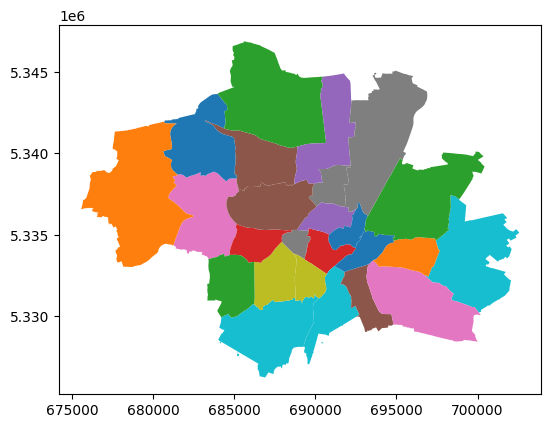

In [75]:
districts_data = load_geojson("data/districts.geojson")
districts_gdf = convert_to_geodataframe(districts_data)
districts_gdf.plot(column="sb_name", legend=False)

## Nachbarschaftstreffs

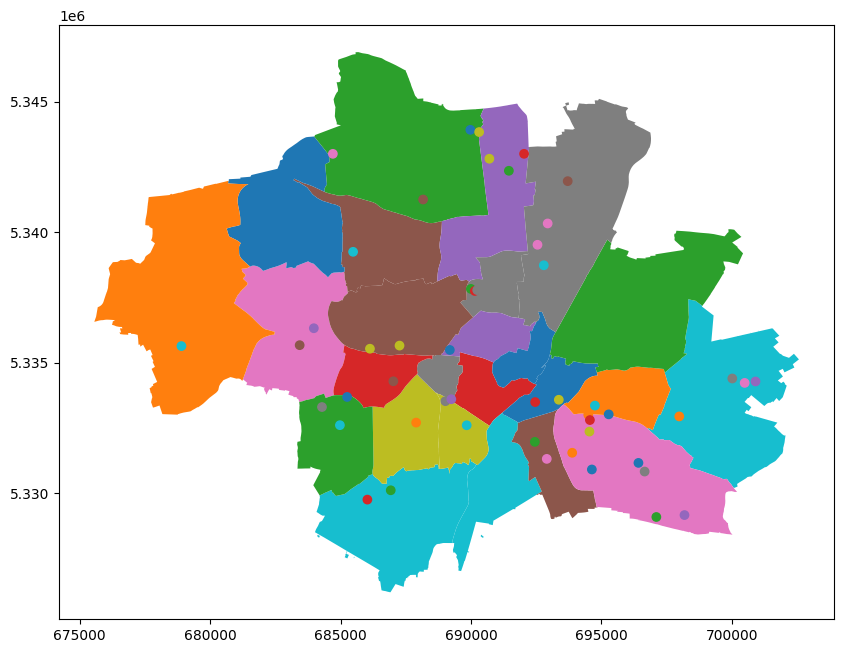

sb_name
Ramersdorf-Perlach                                        10
Trudering-Riem                                             4
Feldmoching-Hasenbergl                                     4
Milbertshofen-Am Hart                                      4
Schwabing-Freimann                                         4
Berg am Laim                                               3
Hadern                                                     3
Schwabing-West                                             3
Pasing-Obermenzing                                         2
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln     2
Sendling                                                   2
Au-Haidhausen                                              2
Obergiesing-Fasangarten                                    2
Moosach                                                    2
Neuhausen-Nymphenburg                                      2
Aubing-Lochhausen-Langwied                                 1
Maxvorstadt     

In [76]:
rank_districts(districts_gdf, "data/neighbourhoods.geojson", column="st2")

## Öffentliche Klos

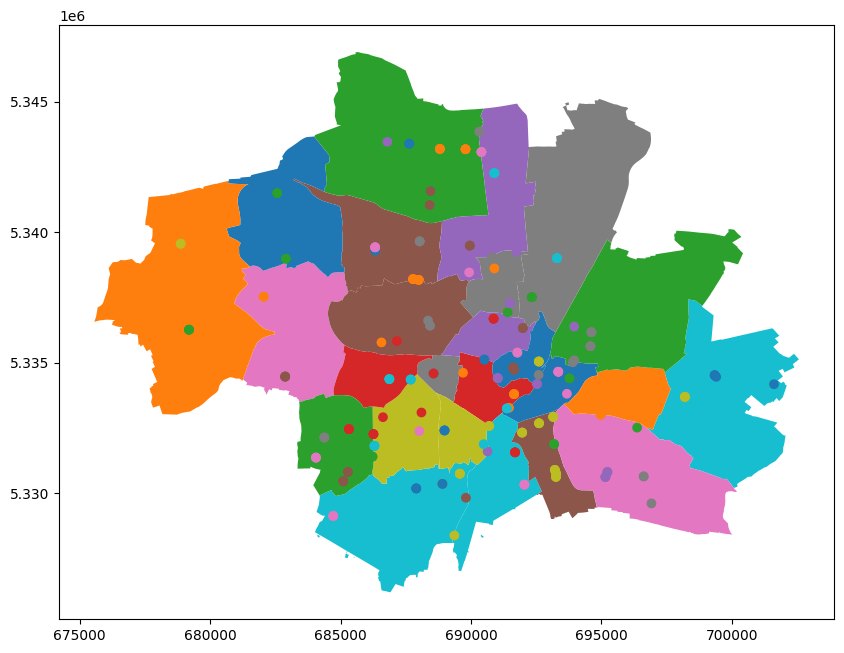

sb_name
Obergiesing-Fasangarten                                   22
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln    18
Hadern                                                    18
Ludwigsvorstadt-Isarvorstadt                              18
Milbertshofen-Am Hart                                     18
Altstadt-Lehel                                            17
Sendling                                                  15
Au-Haidhausen                                             14
Trudering-Riem                                            14
Feldmoching-Hasenbergl                                    14
Untergiesing-Harlaching                                   13
Bogenhausen                                               13
Sendling-Westpark                                         13
Schwabing-West                                            13
Ramersdorf-Perlach                                        12
Moosach                                                   10
Laim            

In [77]:
rank_districts(districts_gdf, "data/wc_finder_opendata.geojson", column="strasse")

## Märkte

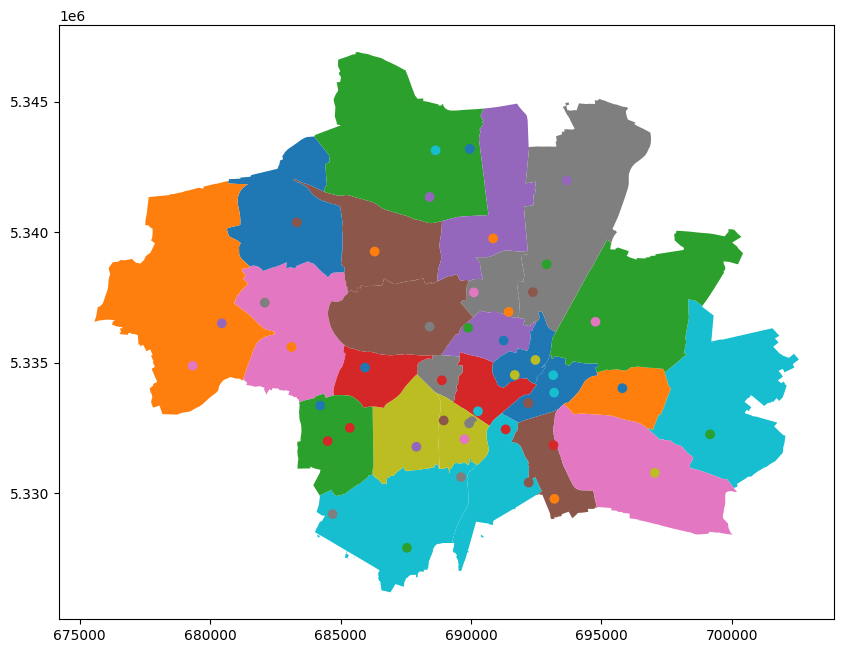

sb_name
Sendling                                                  6
Au-Haidhausen                                             4
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln    4
Schwabing-Freimann                                        3
Feldmoching-Hasenbergl                                    3
Hadern                                                    3
Altstadt-Lehel                                            3
Maxvorstadt                                               3
Ramersdorf-Perlach                                        2
Pasing-Obermenzing                                        2
Obergiesing-Fasangarten                                   2
Untergiesing-Harlaching                                   2
Schwabing-West                                            2
Bogenhausen                                               2
Trudering-Riem                                            2
Aubing-Lochhausen-Langwied                                2
Schwanthalerhöhe                

In [78]:
rank_districts(districts_gdf, "data/markets.geojson", column="adresse")

## Baustellen

Error processing point 226 and district Ludwigsvorstadt-Isarvorstadt: TopologyException: side location conflict at 692201.38959862757 5334920.3457127875. This can occur if the input geometry is invalid.
Error processing point 226 and district Au-Haidhausen: TopologyException: side location conflict at 692201.38959862757 5334920.3457127875. This can occur if the input geometry is invalid.
Error processing point 226 and district Altstadt-Lehel: TopologyException: side location conflict at 692201.38959862757 5334920.3457127875. This can occur if the input geometry is invalid.
Error processing point 227 and district Ludwigsvorstadt-Isarvorstadt: TopologyException: side location conflict at 692201.38959862757 5334920.3457127875. This can occur if the input geometry is invalid.
Error processing point 227 and district Au-Haidhausen: TopologyException: side location conflict at 692201.38959862757 5334920.3457127875. This can occur if the input geometry is invalid.
Error processing point 227 an

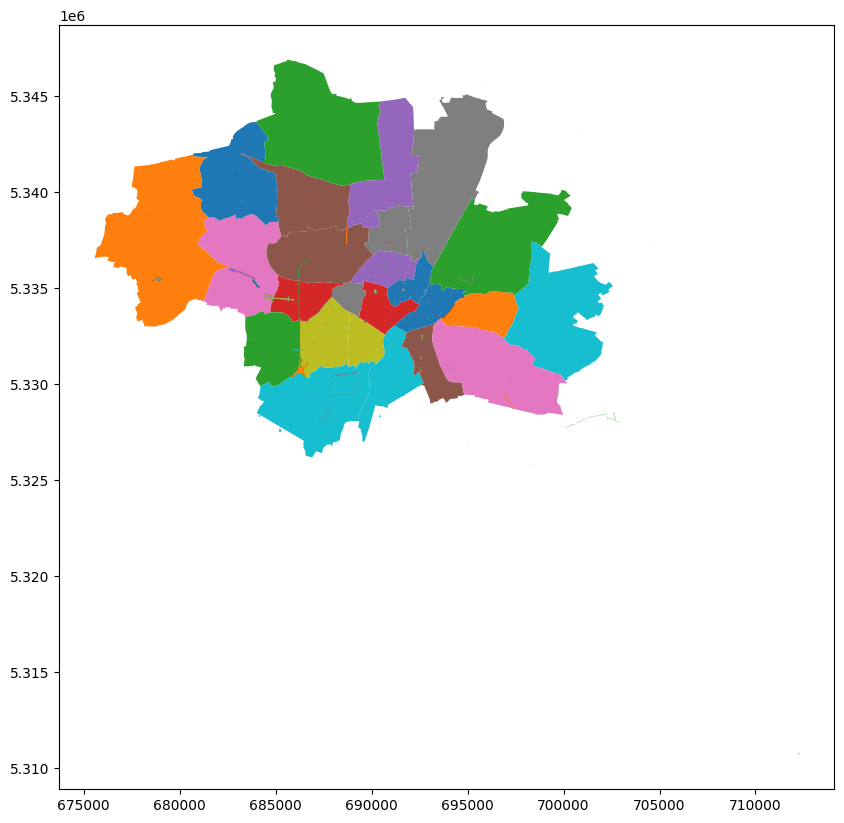

sb_name
Altstadt-Lehel                                            388
Maxvorstadt                                               373
Neuhausen-Nymphenburg                                     344
Ludwigsvorstadt-Isarvorstadt                              322
Schwabing-Freimann                                        274
Laim                                                      257
Pasing-Obermenzing                                        256
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln    245
Schwabing-West                                            243
Bogenhausen                                               237
Au-Haidhausen                                             236
Milbertshofen-Am Hart                                     135
Sendling-Westpark                                         132
Hadern                                                    121
Allach-Untermenzing                                       121
Ramersdorf-Perlach                                        112


In [81]:
rank_districts(districts_gdf, "data/baustellen_opendata.geojson", column="strasse_hausnr")

## Zuständige Kaminkehrer

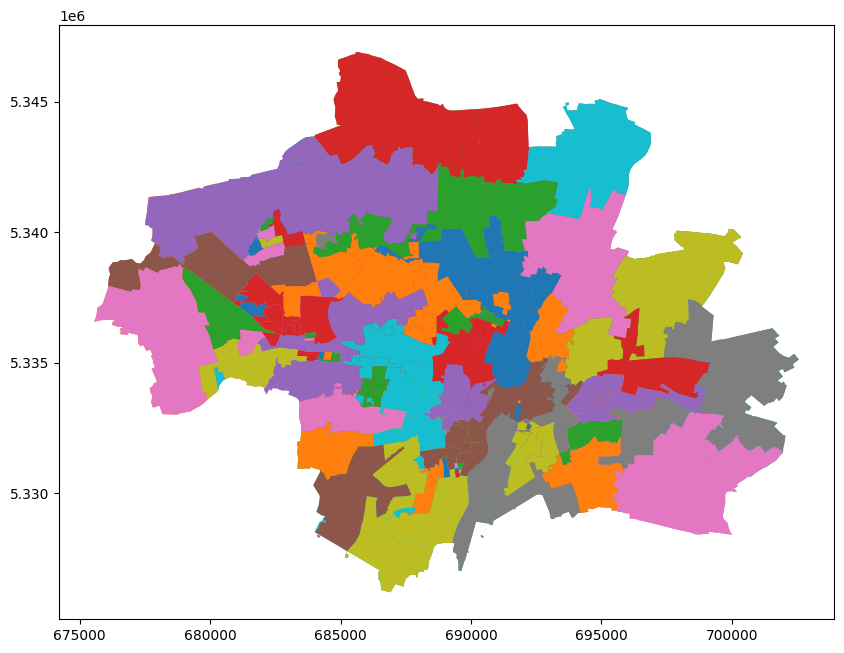

sb_name
Pasing-Obermenzing                                        19
Allach-Untermenzing                                        8
Neuhausen-Nymphenburg                                      7
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln     7
Maxvorstadt                                                5
Au-Haidhausen                                              4
Obergiesing-Fasangarten                                    4
Laim                                                       3
Moosach                                                    2
Bogenhausen                                                1
Ludwigsvorstadt-Isarvorstadt                               1
Ramersdorf-Perlach                                         1
Schwabing-West                                             1
Untergiesing-Harlaching                                    1
dtype: int64

In [87]:
rank_districts(districts_gdf, "data/kaminkehrer.geojson", column="kehrbezirk")